# Observation of absorption effect

The effect is presented with the model :

$$\frac{\partial E}{\partial z} = - \frac{\sigma}{2}(1 + i\omega\tau)\rho E  $$

In this case, we can obtain the analytical solution by integrating the equation. With the analytical solution, like our study of other effect, we want to verify that the numerical solution obtained is good enough to use in split method when we solve the equation with all the effect.

The analytical solution which is derived in the report :

\begin{equation}
    \left|E(x,y,z)\right|^2 = I(x,y,z) = \frac{I_0(x,y)}{\left(1 + \frac{\sigma\beta^{(K)}t_p}{\hbar\omega}\sqrt{\frac{\pi}{8K}}I_0(x,y)^Kz\right)^{1/K}}
\end{equation}



## Comparaison between analytical and numrical solution

Position: z =  0.0
Mean:  (1+0j)
Standard deviation:  4.1957363356e-17
------------
Position: z =  0.6
Mean:  (1+2.95359341979e-10j)
Standard deviation:  2.00975536825e-09
------------
Position: z =  0.83
Mean:  (1+4.08580423056e-10j)
Standard deviation:  2.78016160302e-09
------------
Position: z =  1.0
Mean:  (1+4.92265569933e-10j)
Standard deviation:  3.34959228026e-09
------------


/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


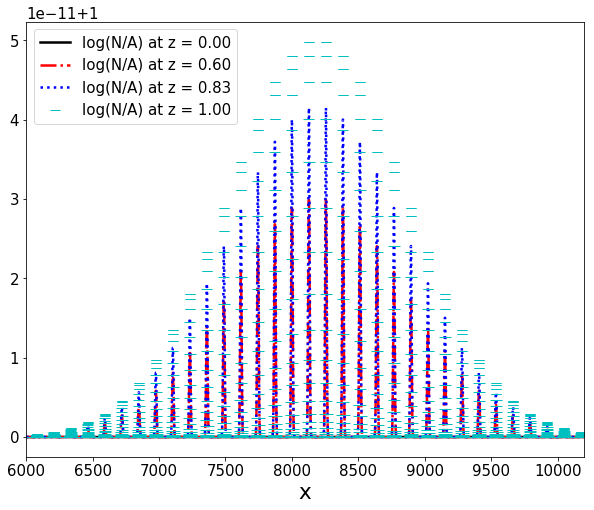

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Zoom the figure in matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

#Import parameters from python
parameter = np.loadtxt("../results/Plasma/parameters_plasma.txt")
Pcr = parameter[0]
k = parameter[1]
K = parameter[2]
L = parameter[3]
N = int(parameter[4])
Lz = parameter[5]
Nz = int(parameter[6])
nb_save = int(parameter[7])
w0 = parameter[8]
p = parameter[9]

lamb = 775*1e-9
beta = 6.5*1e-104
cross = 5.1*1e-24 
light = 3*1e8
omega = 2*np.pi*light/lamb
tau = 3.5*1e-13
hbar = 6.62*1e-34/np.pi
tp = 85*1e-15
const1 = -cross/2*(1 + 1j*omega*tau)*beta/(K*hbar*omega)*tp*(np.pi/8*K)**(1/2)
const1 = const1*(10**8)**(2*K)


#spacial discretization along x and y, need to be the same as production codes
r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)

#Numerical solution
inten_num = np.loadtxt("../results/Plasma/intensity_plasma.txt")
nb_pics = int((inten_num.shape[0]*inten_num.shape[1])/(2*N)**2)
inten_num = inten_num.reshape((nb_pics, 2*N, 2*N))

#Analytical solution 
I0 = inten_num[0]      #I0: I at z = 0
inten_analy = lambda z : I0*(1 - 2*K*const1*I0**(K)*z)**(-1/K)

z_interested = np.array([0, 0.6, 0.83, Lz-1])
pos_interested = z_interested*nb_save/Lz
pos_interested = pos_interested.astype(int)
colors = ['k-', 'r-.', 'b:', 'c_']

for i in range(4):
    A = (inten_num[pos_interested[i]]/inten_analy(z_interested[i])).flatten()
    print("Position: z = ",  z_interested[i])
    print("Mean: ", np.mean(A))
    print("Standard deviation: ", np.std(A))
    print("------------")
    x = np.linspace(0, 4*N**2, 4*N**2)
    plt.plot(x, A, colors[i], label = 'log(N/A) at z = %.2f' %z_interested[i])

plt.xlabel('x')
plt.xlim(6000, 10200)
plt.legend()
# save figure as pdf
plt.savefig("../figures/inten_compare_plasma.png")
plt.show()

